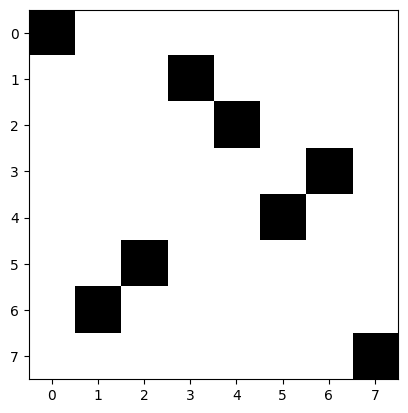

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_initial_state(initial_state):
    unique = []
    i = 0
    while i < 8:
        pos = np.random.randint(low=0, high=64)
        if pos in unique:
            continue

        unique.append(pos)
        i += 1

    for u in unique:
        initial_state[u // 8][u % 8] = 1

def energy(x):
    E1=0
    for j in range(8):
        sum_ = 0
        for i in range(8):
            sum_ += x[i][j]
        sum_ -= 1
        E1 += pow(sum_, 2)

    E2=0
    for i in range(8):
        sum_ = 0
        for j in range(8):
            sum_ += x[i][j]
        sum_ -= 1
        E2 += pow(sum_, 2)

    return E1 + E2

def flip(curr_energy, x):
    while True:
        pos1 = np.random.randint(low=0, high=64)
        pos2 = np.random.randint(low=0, high=64)

        if x[pos1 // 8][pos1 % 8] != 1 and x[pos2 // 8][pos2 % 8] != 0:
            continue

        if x[pos1 // 8][pos1 % 8] == 1 and x[pos2 // 8][pos2 % 8] == 0:
            x[pos1 // 8][pos1 % 8] = 0
            x[pos2 // 8][pos2 % 8] = 1

            new_energy = energy(x)

            if curr_energy > new_energy:  # Check if new energy is lower
                curr_energy = new_energy  # Update current energy
            else:  # Revert the changes if energy doesn't decrease
                x[pos1 // 8][pos1 % 8] = 1
                x[pos2 // 8][pos2 % 8] = 0
            break

    return curr_energy

initial_state = np.zeros((8, 8))
generate_initial_state(initial_state)
plt.imshow(initial_state, cmap='binary', interpolation='nearest')
curr_energy = energy(initial_state)

iterations = 1000
x = initial_state
for i in range(iterations):
    curr_energy = flip(curr_energy, x)
    plt.imshow(initial_state, cmap='binary', interpolation='nearest')